<a href="https://colab.research.google.com/github/sohyun-jang/sohyun-jang/blob/main/CV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# ✅ 이미지 경로 설정
IMG_PATH = "/content/drive/MyDrive/Colab_Notebooks/parrot.png"

import os
if not os.path.exists(IMG_PATH):
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다:\n{IMG_PATH}")
else:
    print("이미지 경로 확인 완료 ✅!")

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

Mounted at /content/drive
이미지 경로 확인 완료 ✅!


In [2]:
# =============================================================================
# 1️⃣ 이미지 읽기 및 전처리
# =============================================================================
parrot_img = cv.imread(IMG_PATH)
if parrot_img is None:
    raise FileNotFoundError("이미지를 불러올 수 없습니다.")

# 그레이스케일 변환 (필터링 작업용)
gray = cv.cvtColor(parrot_img, cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(parrot_img, cv.COLOR_BGR2RGB)

print(f"이미지 크기: {gray.shape}")


이미지 크기: (1198, 766)


In [3]:
# =============================================================================
# 2️⃣ 평균 필터 - For Loop로 직접 구현
# =============================================================================
def manual_average_filter(image, kernel_size=3):
    """
    평균 필터를 for loop로 직접 구현
    """
    h, w = image.shape
    pad = kernel_size // 2

    # 패딩 추가 (경계 처리)
    padded = np.pad(image, pad, mode='edge')
    output = np.zeros_like(image, dtype=np.float32)

    # 컨볼루션 연산
    for i in range(h):
        for j in range(w):
            # 커널 영역 추출
            region = padded[i:i+kernel_size, j:j+kernel_size]
            # 평균 계산
            output[i, j] = np.mean(region)

    return np.uint8(output)

print("\n⏱️ 수동 평균 필터 처리 중...")
start_time = time.time()
manual_avg = manual_average_filter(gray, kernel_size=5)
manual_time = time.time() - start_time
print(f"   처리 시간: {manual_time:.3f}초")


⏱️ 수동 평균 필터 처리 중...
   처리 시간: 5.528초



⏱️ cv2.filter2D 평균 필터 처리 중...
   처리 시간: 0.004초
   속도 향상: 1281.4배 빠름!
   수동 구현 vs cv2 차이 (평균): 0.512605


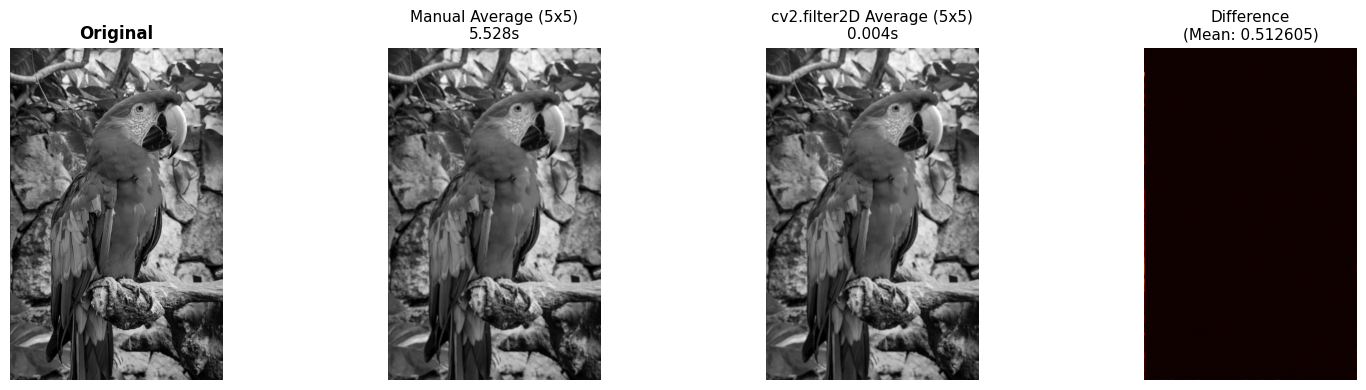

In [5]:
# =============================================================================
# 3️⃣ 평균 필터 - cv2.filter2D() 사용
# =============================================================================
def cv2_average_filter(image, kernel_size=3):
    """
    cv2.filter2D()를 사용한 평균 필터
    """
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    return cv.filter2D(image, -1, kernel)

print("\n⏱️ cv2.filter2D 평균 필터 처리 중...")
start_time = time.time()
cv2_avg = cv2_average_filter(gray, kernel_size=5)
cv2_time = time.time() - start_time
print(f"   처리 시간: {cv2_time:.3f}초")
print(f"   속도 향상: {manual_time/cv2_time:.1f}배 빠름!")

# 두 결과 비교
difference = np.abs(manual_avg.astype(float) - cv2_avg.astype(float))
print(f"   수동 구현 vs cv2 차이 (평균): {difference.mean():.6f}")

# 시각화
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(gray, cmap='gray')
axs[0].set_title("Original", fontsize=12, weight='bold')
axs[1].imshow(manual_avg, cmap='gray')
axs[1].set_title(f"Manual Average (5x5)\n{manual_time:.3f}s", fontsize=11)
axs[2].imshow(cv2_avg, cmap='gray')
axs[2].set_title(f"cv2.filter2D Average (5x5)\n{cv2_time:.3f}s", fontsize=11)
axs[3].imshow(difference, cmap='hot')
axs[3].set_title(f"Difference\n(Mean: {difference.mean():.6f})", fontsize=11)

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# =============================================================================
# 4️⃣ CV2 필터 비교 - 평균, 가우시안, 소벨
# =============================================================================
print("\n🔍 다양한 필터 적용 중...")

# 평균 필터 (여러 커널 크기)
avg_3x3 = cv.blur(gray, (3, 3))
avg_5x5 = cv.blur(gray, (5, 5))
avg_9x9 = cv.blur(gray, (9, 9))

# 가우시안 필터 (sigma 값 비교)
gaussian_sigma1 = cv.GaussianBlur(gray, (5, 5), sigmaX=1)
gaussian_sigma3 = cv.GaussianBlur(gray, (5, 5), sigmaX=3)
gaussian_sigma5 = cv.GaussianBlur(gray, (9, 9), sigmaX=5)

# 소벨 필터 (X, Y, 합성)
sobel_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# 소벨 커널 크기 비교
sobel_k3 = cv.Sobel(gray, cv.CV_64F, 1, 1, ksize=3)
sobel_k5 = cv.Sobel(gray, cv.CV_64F, 1, 1, ksize=5)
sobel_k7 = cv.Sobel(gray, cv.CV_64F, 1, 1, ksize=7)

# 절대값 변환 및 정규화
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))
sobel_combined = np.uint8(np.absolute(sobel_combined))
sobel_k3 = np.uint8(np.absolute(sobel_k3))
sobel_k5 = np.uint8(np.absolute(sobel_k5))
sobel_k7 = np.uint8(np.absolute(sobel_k7))


🔍 다양한 필터 적용 중...


/tmp/ipython-input-1751511469.py:17: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1751511469.py:17: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1751511469.py:17: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1751511469.py:17: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1751511469.py:17: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1751511469.py:17: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1751511469.py:17: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_lay

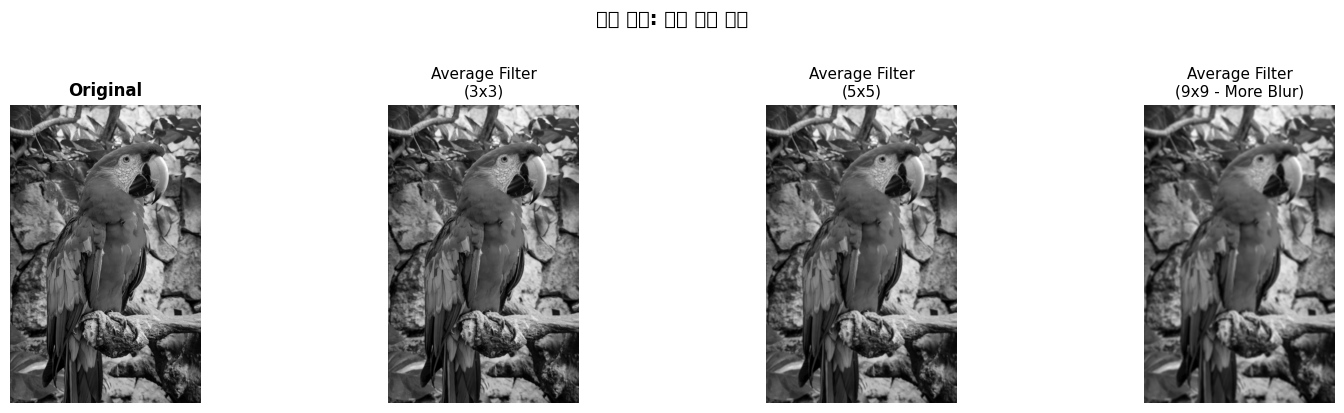

In [7]:
# =============================================================================
# 5️⃣ 평균 필터 파라미터 비교
# =============================================================================
fig1, axs1 = plt.subplots(1, 4, figsize=(16, 4))
axs1[0].imshow(gray, cmap='gray')
axs1[0].set_title("Original", fontsize=12, weight='bold')
axs1[1].imshow(avg_3x3, cmap='gray')
axs1[1].set_title("Average Filter\n(3x3)", fontsize=11)
axs1[2].imshow(avg_5x5, cmap='gray')
axs1[2].set_title("Average Filter\n(5x5)", fontsize=11)
axs1[3].imshow(avg_9x9, cmap='gray')
axs1[3].set_title("Average Filter\n(9x9 - More Blur)", fontsize=11)

for ax in axs1:
    ax.axis('off')
plt.suptitle("평균 필터: 커널 크기 비교", fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3954190408.py:17: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3954190408.py:17: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3954190408.py:17: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3954190408.py:17: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3954190408.py:17: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3954190408.py:17: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3954190408.py:17: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tm

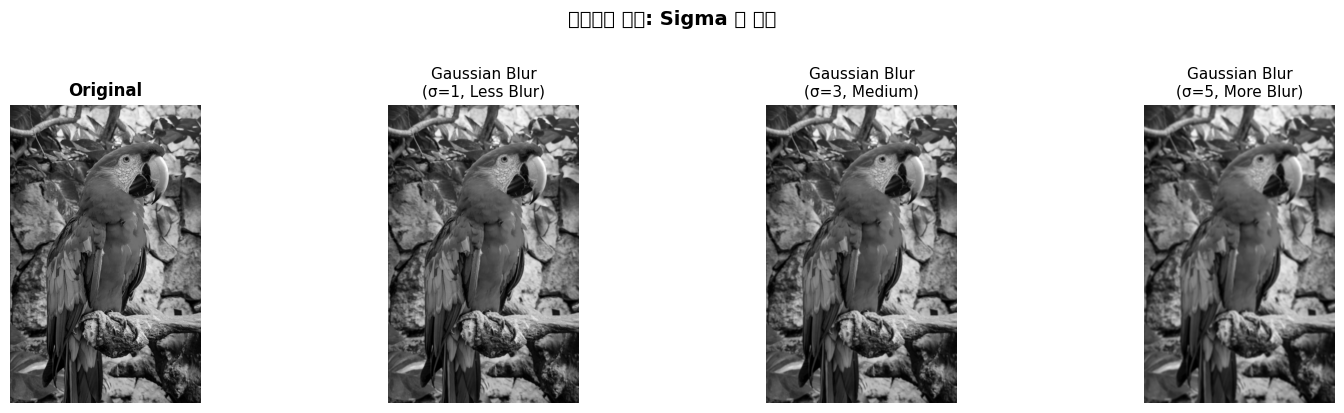

In [8]:
# =============================================================================
# 6️⃣ 가우시안 필터 파라미터 비교
# =============================================================================
fig2, axs2 = plt.subplots(1, 4, figsize=(16, 4))
axs2[0].imshow(gray, cmap='gray')
axs2[0].set_title("Original", fontsize=12, weight='bold')
axs2[1].imshow(gaussian_sigma1, cmap='gray')
axs2[1].set_title("Gaussian Blur\n(σ=1, Less Blur)", fontsize=11)
axs2[2].imshow(gaussian_sigma3, cmap='gray')
axs2[2].set_title("Gaussian Blur\n(σ=3, Medium)", fontsize=11)
axs2[3].imshow(gaussian_sigma5, cmap='gray')
axs2[3].set_title("Gaussian Blur\n(σ=5, More Blur)", fontsize=11)

for ax in axs2:
    ax.axis('off')
plt.suptitle("가우시안 필터: Sigma 값 비교", fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3740506134.py:29: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3740506134.py:29: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3740506134.py:29: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3740506134.py:29: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3740506134.py:29: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3740506134.py:29: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3740506134.py:29: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout

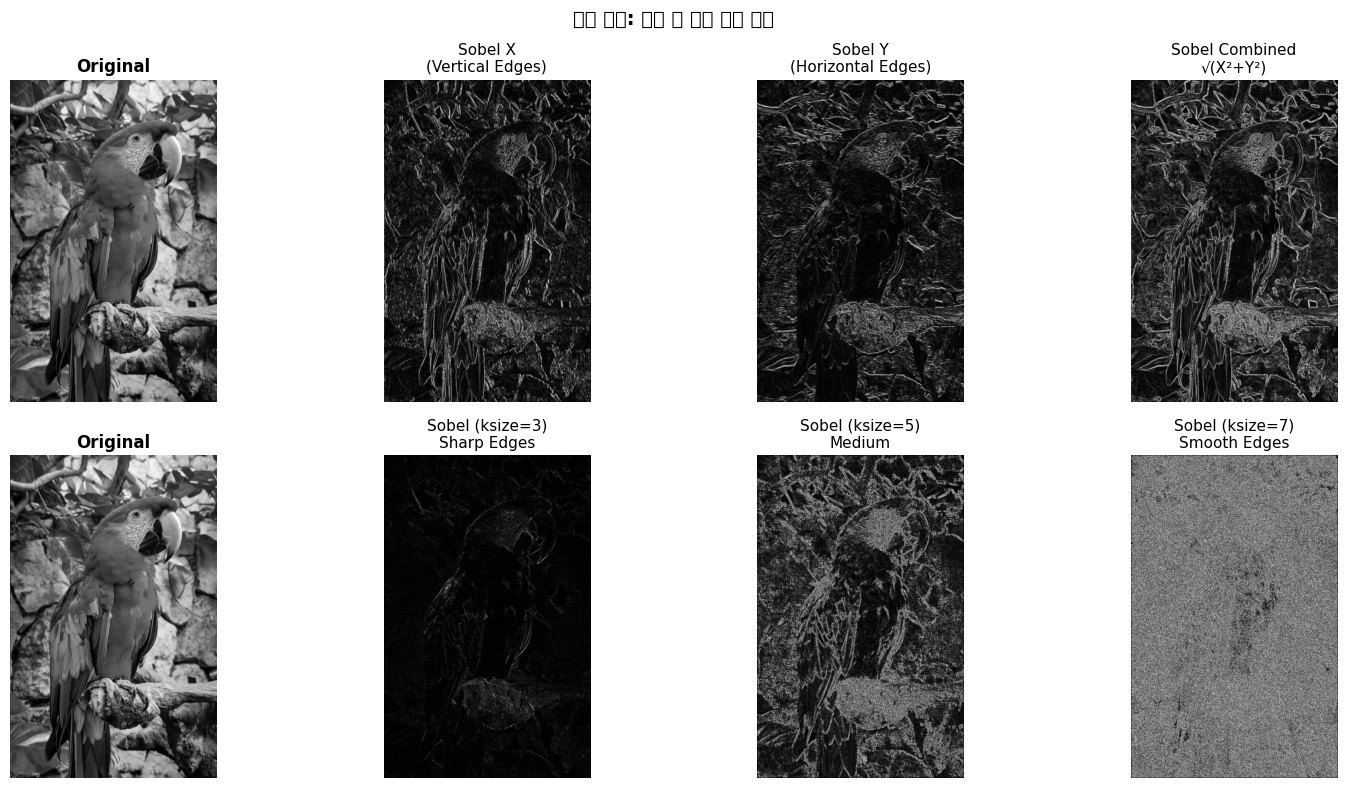

In [9]:
# =============================================================================
# 7️⃣ 소벨 필터 방향 및 파라미터 비교
# =============================================================================
fig3, axs3 = plt.subplots(2, 4, figsize=(16, 8))

# 첫 번째 행: 방향별 소벨
axs3[0,0].imshow(gray, cmap='gray')
axs3[0,0].set_title("Original", fontsize=12, weight='bold')
axs3[0,1].imshow(sobel_x, cmap='gray')
axs3[0,1].set_title("Sobel X\n(Vertical Edges)", fontsize=11)
axs3[0,2].imshow(sobel_y, cmap='gray')
axs3[0,2].set_title("Sobel Y\n(Horizontal Edges)", fontsize=11)
axs3[0,3].imshow(sobel_combined, cmap='gray')
axs3[0,3].set_title("Sobel Combined\n√(X²+Y²)", fontsize=11)

# 두 번째 행: 커널 크기 비교
axs3[1,0].imshow(gray, cmap='gray')
axs3[1,0].set_title("Original", fontsize=12, weight='bold')
axs3[1,1].imshow(sobel_k3, cmap='gray')
axs3[1,1].set_title("Sobel (ksize=3)\nSharp Edges", fontsize=11)
axs3[1,2].imshow(sobel_k5, cmap='gray')
axs3[1,2].set_title("Sobel (ksize=5)\nMedium", fontsize=11)
axs3[1,3].imshow(sobel_k7, cmap='gray')
axs3[1,3].set_title("Sobel (ksize=7)\nSmooth Edges", fontsize=11)

for ax in axs3.ravel():
    ax.axis('off')
plt.suptitle("소벨 필터: 방향 및 커널 크기 비교", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()


In [10]:
# =============================================================================
# 8️⃣ 영상 8배 확대 - 다양한 Interpolation 기법
# =============================================================================
print("\n🔎 이미지 8배 확대 중 (다양한 보간법)...")

# 원본 이미지 크기
h, w = gray.shape
new_size = (w * 8, h * 8)

# 다양한 보간법 적용
nearest = cv.resize(gray, new_size, interpolation=cv.INTER_NEAREST)
linear = cv.resize(gray, new_size, interpolation=cv.INTER_LINEAR)
cubic = cv.resize(gray, new_size, interpolation=cv.INTER_CUBIC)
lanczos = cv.resize(gray, new_size, interpolation=cv.INTER_LANCZOS4)
area = cv.resize(gray, new_size, interpolation=cv.INTER_AREA)

print(f"원본 크기: {gray.shape} → 확대 크기: {nearest.shape}")

# 일부 영역만 크롭해서 비교 (전체를 표시하면 너무 커서)
crop_y, crop_x = h//4, w//4
crop_h, crop_w = 100, 100

crop_orig = gray[crop_y:crop_y+crop_h, crop_x:crop_x+crop_w]
crop_nearest = nearest[crop_y*8:crop_y*8+crop_h*8, crop_x*8:crop_x*8+crop_w*8]
crop_linear = linear[crop_y*8:crop_y*8+crop_h*8, crop_x*8:crop_x*8+crop_w*8]
crop_cubic = cubic[crop_y*8:crop_y*8+crop_h*8, crop_x*8:crop_x*8+crop_w*8]
crop_lanczos = lanczos[crop_y*8:crop_y*8+crop_h*8, crop_x*8:crop_x*8+crop_w*8]



🔎 이미지 8배 확대 중 (다양한 보간법)...
원본 크기: (1198, 766) → 확대 크기: (9584, 6128)


/tmp/ipython-input-1703499319.py:30: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1703499319.py:30: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1703499319.py:30: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1703499319.py:30: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1703499319.py:30: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1703499319.py:30: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1703499319.py:30: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

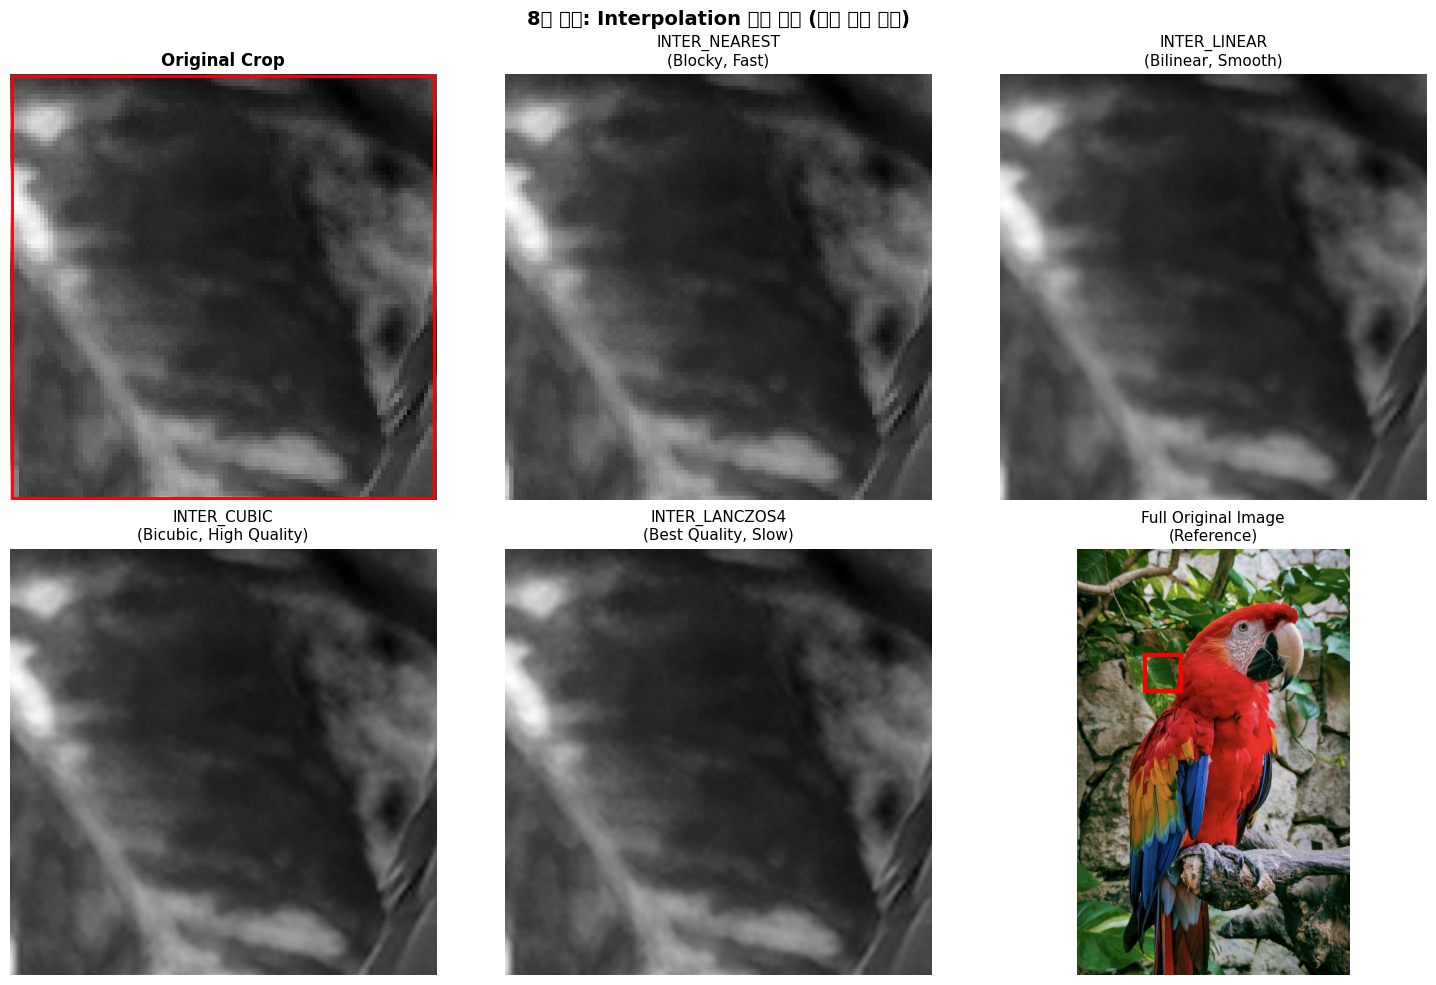

In [11]:
# =============================================================================
# 9️⃣ Interpolation 비교 시각화
# =============================================================================
fig4, axs4 = plt.subplots(2, 3, figsize=(15, 10))

axs4[0,0].imshow(crop_orig, cmap='gray')
axs4[0,0].set_title("Original Crop", fontsize=12, weight='bold')
axs4[0,0].add_patch(plt.Rectangle((0, 0), crop_w-1, crop_h-1, fill=False, edgecolor='red', linewidth=2))

axs4[0,1].imshow(crop_nearest, cmap='gray')
axs4[0,1].set_title("INTER_NEAREST\n(Blocky, Fast)", fontsize=11)

axs4[0,2].imshow(crop_linear, cmap='gray')
axs4[0,2].set_title("INTER_LINEAR\n(Bilinear, Smooth)", fontsize=11)

axs4[1,0].imshow(crop_cubic, cmap='gray')
axs4[1,0].set_title("INTER_CUBIC\n(Bicubic, High Quality)", fontsize=11)

axs4[1,1].imshow(crop_lanczos, cmap='gray')
axs4[1,1].set_title("INTER_LANCZOS4\n(Best Quality, Slow)", fontsize=11)

axs4[1,2].imshow(rgb)
axs4[1,2].set_title("Full Original Image\n(Reference)", fontsize=11)
axs4[1,2].add_patch(plt.Rectangle((crop_x, crop_y), crop_w, crop_h, fill=False, edgecolor='red', linewidth=3))

for ax in axs4.ravel():
    ax.axis('off')

plt.suptitle("8배 확대: Interpolation 기법 비교 (빨간 영역 확대)", fontsize=14, weight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [12]:
# =============================================================================
# 🔟 속도 비교
# =============================================================================
print("\n⚡ Interpolation 기법별 처리 속도 비교:")

methods = {
    'NEAREST': cv.INTER_NEAREST,
    'LINEAR': cv.INTER_LINEAR,
    'CUBIC': cv.INTER_CUBIC,
    'LANCZOS4': cv.INTER_LANCZOS4,
    'AREA': cv.INTER_AREA
}

for name, method in methods.items():
    start = time.time()
    _ = cv.resize(gray, new_size, interpolation=method)
    elapsed = time.time() - start
    print(f"   {name:10s}: {elapsed:.4f}초")

print("\n✅ 모든 컨볼루션 연산 및 확대 작업 완료!")


⚡ Interpolation 기법별 처리 속도 비교:
   NEAREST   : 0.0347초
   LINEAR    : 0.0194초
   CUBIC     : 0.0233초
   LANCZOS4  : 0.2223초
   AREA      : 0.0208초

✅ 모든 컨볼루션 연산 및 확대 작업 완료!


In [13]:
# =============================================================================
# 📊 필터 효과 요약
# =============================================================================
print("\n" + "="*60)
print("📋 필터 효과 요약")
print("="*60)
print("🔹 평균 필터: 커널 크기 ↑ → 블러 강도 ↑")
print("🔹 가우시안 필터: σ 값 ↑ → 블러 강도 ↑ (가장자리 보존 우수)")
print("🔹 소벨 필터: 커널 크기 ↑ → 엣지 두께 ↑, 노이즈 감소")
print("🔹 Interpolation:")
print("   • NEAREST: 가장 빠름, 계단 현상 발생")
print("   • LINEAR: 빠르고 부드러움")
print("   • CUBIC: 고품질, 중간 속도")
print("   • LANCZOS4: 최고 품질, 가장 느림")
print("="*60)


📋 필터 효과 요약
🔹 평균 필터: 커널 크기 ↑ → 블러 강도 ↑
🔹 가우시안 필터: σ 값 ↑ → 블러 강도 ↑ (가장자리 보존 우수)
🔹 소벨 필터: 커널 크기 ↑ → 엣지 두께 ↑, 노이즈 감소
🔹 Interpolation:
   • NEAREST: 가장 빠름, 계단 현상 발생
   • LINEAR: 빠르고 부드러움
   • CUBIC: 고품질, 중간 속도
   • LANCZOS4: 최고 품질, 가장 느림
